## Social Media Monitoring with Sentiment Analysis on the Supreme Court’s Overturning on Roe vs. Wade

### Data Preparation: scraping 200,000 tweets from twitter


#### 200,000 tweets are scraped from Twitter to obtain users’ description and text tweeted by users relating to overturning Roe vs Wade. Resource link to get Twitter API Access https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api

In [ ]:
import tweepy
# first apply develop access from twitter to get authentication 
import time
import pandas as pd

pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)
#To get access authorization to scrape data from Twitter api_key, api_key_secret, access_token, 
#access_token_secret is applied and tweepy.OAuthHandler function is called to perform authentication
api_key= insert ''
api_key_secret= ''
access_token=''
access_token_secret= ''

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# setting keywords and limit = 200000 for query 
keywords = 'Roe OR Wade OR abortion lang:en -is:retweet -RT -has:links -has:media -is:verified'
limit = 200000


tweets = tweepy.Cursor(api.search_tweets,
                       q=keywords,
                       count=100,
                       tweet_mode='extended').items(limit)

In [ ]:
# identifying User, User_description, variables to be scraped from
columns = ['User', 'User_description', 'Tweet_text']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.user.description, tweet.full_text])
    
df = pd.DataFrame(data, columns=columns)
# it will give csv file output to computer with file name RoeVsWade_tweets_200000
filename = "RoeVsWade_tweets_" + str(limit) + ".csv"
df.to_csv(filename,index=False)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import nltk
import matplotlib.pyplot as plt
import html
import sklearn.metrics as metrics

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Regression
from sklearn.feature_extraction.text import TfidfVectorizer

# topic modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('wordnet')
from nltk.corpus import opinion_lexicon 
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
nltk.download('opinion_lexicon')
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\saith\Documents\msads599_capstone\module 5\RoeVsWade_tweets_200000.csv")
df.isnull().sum()


User                    0
User_description    28789
Tweet_text              0
dtype: int64

In [3]:
df = df.dropna()

In [4]:
df.head()

,User,User_description,Tweet_text
0,LifeNewsToo,Project of LifeNews the #1 pro-life web site. ...,Two Tennessee Abortion Businesses Have Already...
1,StevenErtelt,Founder and Editor of https://t.co/vMByGKehw4 ...,Two Tennessee Abortion Businesses Have Already...
2,adhdwonderwoman,I make lots of random “funness” on my other fo...,@LeaderMcConnell Labels are BS .Without hesita...
3,Beautoxx_1,Queer He/Him/His Dream of a better world with ...,@taradublinrocks That’s interesting because wh...
4,bdqyrt,lived from WOKEGE,@AUUUGHHHHHHH @cIeancutz Roe and Wade botlane


### Data Preparation: Obtaining Polarity Score to prepare data for Sentiment Analysis

#### Polarity score is used to quantify positive or negative feelings based on twitter user tweeted text relating to overturning Roe vs Wade. To calculate polarity of a text, each word of the text in the dictionary is added to get an overall polarity score

#### To define polarity score function , here is the resource link for TextBlob(text) https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/

In [5]:
#TextBlob is used to calculate a sentence's polarity
# polarity_score(text) is used to quantify sentiment with positive or negative value
# defyning polarity_score functio by using def polarity_score(text):

def polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [6]:
# create list from tweeted text with for loop and apply it to polarity_scores function
# append() is used to add a single item to certain collection types.

polarity_scores = list()
for index, row in df.iterrows():
    tweet = row['Tweet_text']
    score = polarity_score(tweet)
    polarity_scores.append(score)

In [7]:
# Polarity column that contained polarity score for each tweeted text by respective users is added to the data frame
df['Polarity'] = polarity_scores

In [8]:
df.head()

,User,User_description,Tweet_text,Polarity
0,LifeNewsToo,Project of LifeNews the #1 pro-life web site. ...,Two Tennessee Abortion Businesses Have Already...,-0.1000
1,StevenErtelt,Founder and Editor of https://t.co/vMByGKehw4 ...,Two Tennessee Abortion Businesses Have Already...,-0.1000
2,adhdwonderwoman,I make lots of random “funness” on my other fo...,@LeaderMcConnell Labels are BS .Without hesita...,-0.0375
3,Beautoxx_1,Queer He/Him/His Dream of a better world with ...,@taradublinrocks That’s interesting because wh...,0.3000
4,bdqyrt,lived from WOKEGE,@AUUUGHHHHHHH @cIeancutz Roe and Wade botlane,0.0000


<AxesSubplot:xlabel='Polarity', ylabel='Count'>

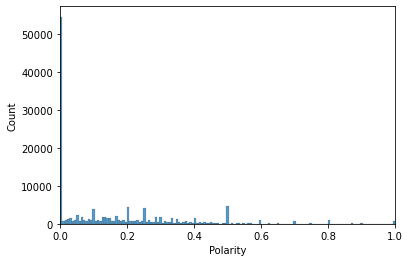

In [9]:
# distribution of polarity scores in a large group of 200,000 tweets
director_plot = sns.histplot(df['Polarity'])
director_plot.set(xlim=(0, 1))
director_plot

## Data Preparation and Aggregation

#### Resources for defining cleaning text function html.unescape(text)  https://www.geeksforgeeks.org/html-unescape-in-python/  re.sub() function : https://www.pythontutorial.net/python-regex/python-regex-sub/

In [12]:
def Textcleaner(text):

    text = html.unescape(text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
   
    return text.strip()

def punctuation_remover(text, exclude=None):
    pset = set(punctuation) 
    pset = pset - exclude
    
    return ''.join([i for i in text if i not in pset])

def tokenization(text):

    ret = text.lower()
    ret = ret.split(' ')

    
    return [i for i in ret if i is not '']

def remove_stopwords(tokens, exclude):
    sw = set(stopwords.words("english"))
    sw = sw - exclude
    
    return [i for i in tokens if i not in sw]
    

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    
    return [lemmatizer.lemmatize(i) for i in tokens]

<>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-12-4cc02996b2ba>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return [i for i in ret if i is not '']


In [13]:
df['User_description_cleaned'] = df['User_description'].copy()
df['User_description_cleaned'] = df['User_description_cleaned'].apply(Textcleaner)
df['lammetaized_tokens'] = df['User_description_cleaned'].apply(punctuation_remover, exclude=set()).apply(tokenization).apply(remove_stopwords, exclude=set(['not', 'never', 'nor'])).apply(lemmatize)
df['User_description_cleaned'] = df['lammetaized_tokens'].apply(lambda x: ' '.join(x))
df = df[df['lammetaized_tokens'].str.len() > 5]
df = df[df['Polarity'] != 0.0]

# creating for loop with if polarity score is >1 it is positive feeling, if less than 0 it is negative feeling 


polarity_scores = list()
for index, row in df.iterrows():
    polarity = row['Polarity']
    if polarity > 0:
        polarity_scores.append(1)
    else:
        polarity_scores.append(0)
df['Polarity'] = polarity_scores

## Exploratory Data Analysis

#### In a large group of 200,000 tweets that tweeted text "Roe vs. Wade", EDA shows that polarity score quantify 59,884 positive feelings and 30,971 negative feelings toward overturning Roe vs. Wade

In [14]:
df['Polarity'].value_counts()

1    59884
0    30971
Name: Polarity, dtype: int64

<AxesSubplot:xlabel='Polarity', ylabel='Count'>

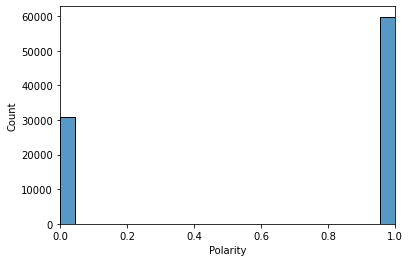

In [15]:

director_plot = sns.histplot(df['Polarity'])
director_plot.set(xlim=(0, 1))
director_plot